# Deep Learning with PyTorch: A 60 Minute Blitz

* http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

# Contents
* What is PyTorch?
* Autograd: automatic differentiation
* Neural Networks
* Training a clssifier

# What is PyTorch?
* Getting Started
    - Tensors
    - Operations
* Numpy Bridge
    - Converting torch Tensor to numpy Array
    - Converting numpy Array to torch Tensor
* CUDA Tensors

## Getting Started
* Tensors
* Operations

### Tensors

In [1]:
from __future__ import print_function
import torch

In [2]:
# Construct a 5x3 matrix, uninitialized:
x = torch.Tensor(5, 3)
print(x)


-3.2512e+08  4.5644e-41 -3.2512e+08
 4.5644e-41  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [3]:
# Construct a randomly initialized matrix
x = torch.rand(5, 3)
print(x)


 0.0417  0.5429  0.2387
 0.5866  0.7413  0.0902
 0.5371  0.1866  0.6694
 0.3538  0.3071  0.6462
 0.6436  0.6419  0.6308
[torch.FloatTensor of size 5x3]



In [4]:
# Get its size
print(x.size())

torch.Size([5, 3])


### Operations

In [5]:
# Addition: syntax 1
y = torch.rand(5, 3)
print(x + y)


 0.2919  0.8090  1.0562
 1.3239  1.2276  0.9518
 0.6759  0.8783  1.0964
 0.9942  0.9679  1.2967
 0.9585  1.2568  1.5135
[torch.FloatTensor of size 5x3]



In [6]:
# Addition: syntax 2
print(torch.add(x, y))


 0.2919  0.8090  1.0562
 1.3239  1.2276  0.9518
 0.6759  0.8783  1.0964
 0.9942  0.9679  1.2967
 0.9585  1.2568  1.5135
[torch.FloatTensor of size 5x3]



In [7]:
# Addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 0.2919  0.8090  1.0562
 1.3239  1.2276  0.9518
 0.6759  0.8783  1.0964
 0.9942  0.9679  1.2967
 0.9585  1.2568  1.5135
[torch.FloatTensor of size 5x3]



In [ ]:
# ????
z = torch.add(x, y)
print(z)              

In [9]:
# Addition: in-place
# adds x to y
y.add_(x)
print(y)


 0.2919  0.8090  1.0562
 1.3239  1.2276  0.9518
 0.6759  0.8783  1.0964
 0.9942  0.9679  1.2967
 0.9585  1.2568  1.5135
[torch.FloatTensor of size 5x3]



In [10]:
# You can use standard numpy-like indexing with all bells and whistles!
print(x[:, 1])


 0.5429
 0.7413
 0.1866
 0.3071
 0.6419
[torch.FloatTensor of size 5]



## Numpy Bridge
* Converting torch Tensor to numpy Array
* Converting numpy Array to torch Tensor

### Converting torch Tensor to numpy Array

In [11]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [12]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [13]:
# See how the numpy array changed in value.
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


### Converting numpy Array to torch Tensor

In [14]:
# See how changing the np array changed the torch Tensor automatically
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## CUDA Tensors

In [15]:
# Tensors can be moved onto GPU using the .cuda function.

# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

# Autograd: automatic differentiation
* Variable
* Gradients

The <font color="red">autograd</font> package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

<img src="https://image.slidesharecdn.com/dynamicdeeplearningmlconf-170324142332/95/soumith-chintala-ai-research-engineer-facebook-at-mlconf-nyc-2017-26-638.jpg?cb=1490365428" width=600 />

<img src="http://pytorch.org/static/img/dynamic_graph.gif" width=600 />

## Variable

<img src="http://pytorch.org/tutorials/_images/Variable.png" width=200 />

In [16]:
import torch
from torch.autograd import Variable

In [17]:
# Create a variable:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [18]:
# Do an operation of variable:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [19]:
# y was created as a result of an operation, so it has a creator.
print(y.creator)

In [ ]:
# ?? x.creator
print(x.creator)

In [21]:
# Do more operations on y
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



## Gradients

In [22]:
# let’s backprop now out.backward() is equivalent to 
# doing out.backward(torch.Tensor([1.0]))
out.backward()

In [23]:
# print gradients d(out)/dx
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [25]:
# You can do many crazy things with autograd!
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
  384.5723
 1247.7805
 -881.0840
[torch.FloatTensor of size 3]



In [26]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# Neural Networks
* Define the network
* Loss Function
* Backprop
* Update the weights

Neural networks can be constructed using the <font color="red">torch.nn</font> package.

<img src="http://pytorch.org/tutorials/_images/mnist.png" width=600 />

A typical training procedure for a neural network is as follows:

* Define the neural network that has some learnable parameters (or weights)
* Iterate over a dataset of inputs
* Process input through the network
* Compute the loss (how far is the output from being correct)
* Propagate gradients back into the network’s parameters
* Update the weights of the network, typically using a simple update rule:
    
    <font color="red">weight = weight + learning_rate * gradient</font>

## Define the network

In [27]:
# Let’s define this network:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


The learnable parameters of a model are returned by <font color="red">net.parameters()</font>

In [28]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [ ]:
# ???
params

The input to the forward is an <font color="red">autograd.Variable</font>, and so is the output.

In [30]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0773 -0.1357  0.0376 -0.2236 -0.0406 -0.0434  0.1490 -0.1035  0.1108  0.0868
[torch.FloatTensor of size 1x10]



Zero the gradient buffers of all parameters and backprops with random gradients:

In [31]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## Loss Function

There are several different <font color="red">loss functions</font> under the <font color="red">nn</font> package . A simple loss is: <font color="red">nn.MSELoss</font> which computes the mean-squared error between the input and the target.

In [43]:
output = net(input)
target = Variable(torch.FloatTensor(range(1, 11)))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.4160
[torch.FloatTensor of size 1]



Now, if you follow <font color="red">loss</font> in the backward direction, using it’s <font color="red">.creator</font> attribute, you will see a graph of computations that looks like this:

So, when we call <font color="red">loss.backward()</font>, the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their <font color="red">.grad</font> Variable accumulated with the gradient.

In [46]:
# For illustration, let us follow a few steps backward:
print(loss.creator)  # MSELoss
print(loss.creator.previous_functions[0][0])  # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0])  # ReLU

## Backprop

To backpropogate the error all we have to do is to <font color="red">loss.backward()</font>. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients

Now we shall call <font color="red">loss.backward()</font>, and have a look at conv1’s bias gradients before and after the backward.

In [47]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0841
 0.0014
 0.0232
 0.0285
 0.0011
-0.1594
[torch.FloatTensor of size 6]



## Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

<font color="red">weight = weight - learning_rate * gradient</font>

In [48]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

<font color="red">torch.optim</font> package :

In [49]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Training a clssifier
* What about data?
* Training an image classifier
    - 1. Loading and normalizing CIFAR10
    - 2. Define a Convolution Neural Network
    - 3. Define a loss function
    - 4. Train the network on the training data
    - 5. Test the network on the test data
* Training on GPU

## What about data?

<img src="http://pytorch.org/tutorials/_images/cifar10.png" width=400 />

## Training an image classifier
* 1.Loading and normalizing CIFAR10
* 2.Define a Convolution Neural Network
* 3.Define a loss function
* 4.Train the network on the training data
* 5.Test the network on the test data

### 1. Loading and normalizing CIFAR10

In [50]:
import torch
import torchvision
import torchvision.transforms as transforms

In [51]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting tar file
Done!
Files already downloaded and verified


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


  dog  bird  deer   dog


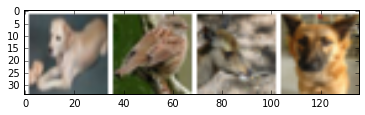

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. Define a Convolution Neural Network

In [53]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3. Define a loss function

In [54]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network on the training data

In [55]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.248
[1,  4000] loss: 1.899
[1,  6000] loss: 1.738
[1,  8000] loss: 1.622
[1, 10000] loss: 1.550
[1, 12000] loss: 1.486
[2,  2000] loss: 1.420
[2,  4000] loss: 1.388
[2,  6000] loss: 1.348
[2,  8000] loss: 1.348
[2, 10000] loss: 1.317
[2, 12000] loss: 1.285
Finished Training


### 5. Test the network on the test data

GroundTruth:    cat  ship  ship plane


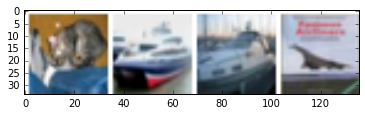

In [56]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [57]:
outputs = net(Variable(images))

In [58]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

Predicted:   frog  ship   car  ship


In [59]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [60]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 71 %
Accuracy of  bird : 39 %
Accuracy of   cat : 32 %
Accuracy of  deer : 40 %
Accuracy of   dog : 21 %
Accuracy of  frog : 81 %
Accuracy of horse : 62 %
Accuracy of  ship : 72 %
Accuracy of truck : 61 %


## Training on GPU

In [ ]:
net.cuda()

In [ ]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

# References
* [1] Deep Learning with PyTorch: A 60 Minute Blitz -http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html